In [30]:
import pandas as pd

# 1️⃣ Load datasets
fear_greed_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# 2️⃣ Display first few rows
print("Fear & Greed Dataset Preview")
display(fear_greed_df.head())

print("\nTrader Dataset Preview")
display(trader_df.head())

# 3️⃣ Column names (VERY IMPORTANT)
print("\nFear & Greed Columns:")
print(fear_greed_df.columns)

print("\nTrader Data Columns:")
print(trader_df.columns)

# 4️⃣ Dataset info
print("\nFear & Greed Info:")
fear_greed_df.info()

print("\nTrader Data Info:")
trader_df.info()

# 5️⃣ Missing values check
print("\nFear & Greed Missing Values:")
print(fear_greed_df.isnull().sum())

print("\nTrader Data Missing Values:")
print(trader_df.isnull().sum())



Fear & Greed Dataset Preview


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Dataset Preview


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear & Greed Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trader Data Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Fear & Greed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---

In [31]:
# =========================================
# STEP 2: DATA CLEANING & FEATURE ENGINEERING
# =========================================

import pandas as pd
import os

# -------------------------------
# 1️⃣ FEAR & GREED DATA CLEANING
# -------------------------------

# Convert date columns to datetime
fear_greed_df['date'] = pd.to_datetime(
    fear_greed_df['date'],
    errors='coerce'
)

fear_greed_df['date_only'] = pd.to_datetime(
    fear_greed_df['date'], # Corrected: use 'date' column to create 'date_only'
    errors='coerce'
).dt.date

# -------------------------------
# 2️⃣ TRADER DATA CLEANING
# -------------------------------

# Convert timestamp columns (mixed + day-first)
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

trader_df['Timestamp'] = pd.to_datetime(
    trader_df['Timestamp'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Convert trade_date to pure date
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date # Corrected: use 'Timestamp IST' to create 'trade_date'

# -------------------------------
# 3️⃣ NUMERIC CONVERSIONS
# -------------------------------

numeric_cols = [
    'Closed PnL',
    'Size Tokens',
    'Size USD',
    'Fee'
]

for col in numeric_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

# -------------------------------
# 4️⃣ FEATURE ENGINEERING
# -------------------------------

# Profit / Loss flag
trader_df['is_profitable'] = trader_df['Closed PnL'] > 0

# Risk exposure proxy (USD-based)
trader_df['abs_exposure_usd'] = trader_df['Size USD'].abs()

# Trade side encoding
trader_df['side_encoded'] = trader_df['Side'].map({
    'BUY': 1,
    'SELL': -1
})

# -------------------------------
# 5️⃣ SANITY CHECKS
# -------------------------------

print("Fear & Greed Data Types:")
print(fear_greed_df.dtypes)

print("\nTrader Data Types:")
print(trader_df.dtypes)

print("\nClosed PnL Summary:")
display(trader_df['Closed PnL'].describe())

# -------------------------------
# 6️⃣ SAVE CLEANED DATA (MANDATORY)
# -------------------------------

# Create the directory if it doesn't exist
os.makedirs('csv_files', exist_ok=True)

fear_greed_df.to_csv("csv_files/fear_greed_cleaned.csv", index=False)
trader_df.to_csv("csv_files/trader_cleaned.csv", index=False)

Fear & Greed Data Types:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
date_only                 object
dtype: object

Trader Data Types:
Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST       datetime64[ns]
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp           datetime64[ns]
trade_date                  object
is_profitable                 bool
abs_exposure_usd           float64
side_encoded                 int64
dtype: object

Closed PnL Summary:


,Closed PnL
count,211224.000000
mean,48.749001
std,919.164828
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.792797
max,135329.090100


In [32]:
# =====================================================
# STEP 3: DAILY AGGREGATION & SENTIMENT ALIGNMENT
# =====================================================

import pandas as pd

# -------------------------------
# 1️⃣ LOAD CLEANED DATA
# -------------------------------

fear_greed_df = pd.read_csv("csv_files/fear_greed_cleaned.csv")
trader_df = pd.read_csv("csv_files/trader_cleaned.csv")

# Ensure date fields are in correct format
fear_greed_df['date_only'] = pd.to_datetime(
    fear_greed_df['date_only'],
    errors='coerce'
).dt.date

trader_df['trade_date'] = pd.to_datetime(
    trader_df['trade_date'],
    errors='coerce'
).dt.date

# -------------------------------
# 2️⃣ AGGREGATE SENTIMENT (DAILY)
# -------------------------------

fear_greed_daily = (
    fear_greed_df
    .groupby('date_only', as_index=False)
    .agg(
        classification=('classification', 'first'),
        sentiment_value=('value', 'mean')
    )
)

# -------------------------------
# 3️⃣ AGGREGATE TRADER DATA (DAILY)
# -------------------------------

daily_trader_metrics = (
    trader_df
    .groupby('trade_date', as_index=False)
    .agg(
        total_pnl=('Closed PnL', 'sum'),
        avg_pnl=('Closed PnL', 'mean'),
        win_rate=('is_profitable', 'mean'),
        total_volume_usd=('Size USD', 'sum'),
        trade_count=('Trade ID', 'count'),
        avg_fee=('Fee', 'mean')
    )
)

# -------------------------------
# 4️⃣ MERGE TRADER + SENTIMENT
# -------------------------------

sentiment_trader_df = pd.merge(
    daily_trader_metrics,
    fear_greed_daily,
    left_on='trade_date',
    right_on='date_only',
    how='inner'
)

# -------------------------------
# 5️⃣ FINAL SANITY CHECK
# -------------------------------

print("Final Dataset Shape:", sentiment_trader_df.shape)
print("\nFinal Dataset Columns:")
print(sentiment_trader_df.columns)

display(sentiment_trader_df.head())

# -------------------------------
# 6️⃣ SAVE FINAL DATASET
# -------------------------------

sentiment_trader_df.to_csv(
    "csv_files/sentiment_trader_daily.csv",
    index=False
)


Final Dataset Shape: (479, 10)

Final Dataset Columns:
Index(['trade_date', 'total_pnl', 'avg_pnl', 'win_rate', 'total_volume_usd',
       'trade_count', 'avg_fee', 'date_only', 'classification',
       'sentiment_value'],
      dtype='object')


,trade_date,total_pnl,avg_pnl,win_rate,total_volume_usd,trade_count,avg_fee,date_only,classification,sentiment_value
0,2023-05-01,0.000000,0.000000,0.000000,477.00,3,0.000000,2023-05-01,Greed,63.0
1,2023-12-05,0.000000,0.000000,0.000000,50005.83,9,1.389051,2023-12-05,Extreme Greed,75.0
2,2023-12-14,-205.434737,-18.675885,0.363636,113203.35,11,2.572803,2023-12-14,Greed,72.0
3,2023-12-15,-24.632034,-12.316017,0.000000,10609.95,2,1.326245,2023-12-15,Greed,70.0
4,2023-12-16,0.000000,0.000000,0.000000,15348.77,3,1.279063,2023-12-16,Greed,67.0


Dataset Shape: (479, 10)

Sentiment Distribution:
classification
Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: count, dtype: int64

Average Daily Total PnL by Sentiment:
classification
Extreme Fear     52793.589178
Extreme Greed    23817.292199
Fear             36891.818040
Greed            11140.566181
Neutral          19297.323516
Name: total_pnl, dtype: float64


<Figure size 640x480 with 0 Axes>

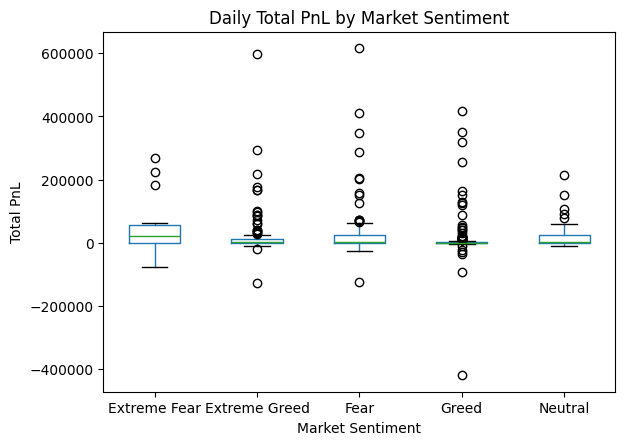


Average Win Rate by Sentiment:
classification
Extreme Fear     0.327341
Extreme Greed    0.467424
Fear             0.329112
Greed            0.335986
Neutral          0.331886
Name: win_rate, dtype: float64


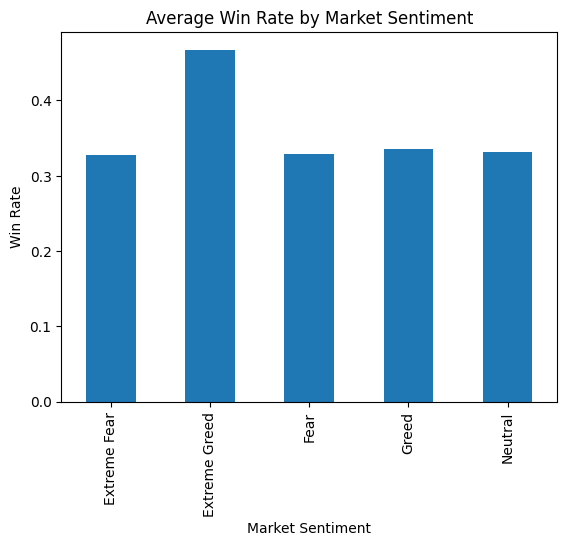


Average Trade Count by Sentiment:
classification
Extreme Fear     1528.571429
Extreme Greed     350.807018
Fear              679.527473
Greed             260.637306
Neutral           562.477612
Name: trade_count, dtype: float64


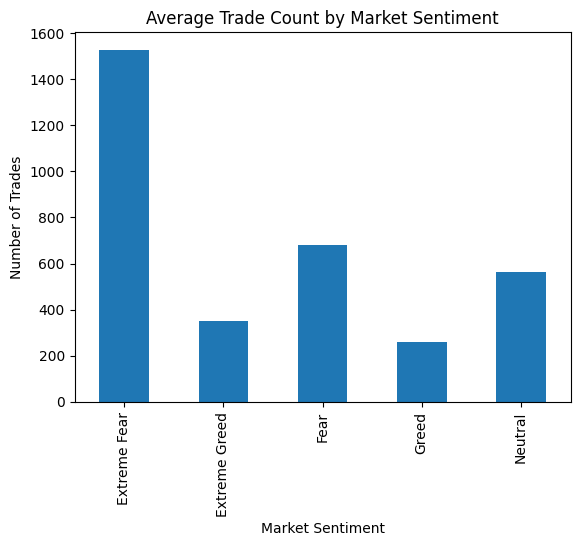


Average Trading Volume (USD) by Sentiment:
classification
Extreme Fear     8.177447e+06
Extreme Greed    1.091800e+06
Fear             5.311261e+06
Greed            1.495246e+06
Neutral          2.690180e+06
Name: total_volume_usd, dtype: float64

Average Fee by Sentiment:
classification
Extreme Fear     0.938658
Extreme Greed    1.044605
Fear             2.211484
Greed            1.886188
Neutral          2.279741
Name: avg_fee, dtype: float64


In [33]:
# ==========================================
# STEP 4: EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import os

# Create the outputs directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# -------------------------------
# 1️⃣ LOAD FINAL DATASET
# -------------------------------

sentiment_trader_df = pd.read_csv(
    "csv_files/sentiment_trader_daily.csv"
)

# -------------------------------
# 2️⃣ BASIC OVERVIEW
# -------------------------------

print("Dataset Shape:", sentiment_trader_df.shape)
print("\nSentiment Distribution:")
print(sentiment_trader_df['classification'].value_counts())

# -------------------------------
# 3️⃣ PROFITABILITY ANALYSIS
# -------------------------------

print("\nAverage Daily Total PnL by Sentiment:")
print(
    sentiment_trader_df
    .groupby('classification')['total_pnl']
    .mean()
)

# Boxplot: Daily Total PnL
plt.figure()
sentiment_trader_df.boxplot(
    column='total_pnl',
    by='classification',
    grid=False
)
plt.title("Daily Total PnL by Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Total PnL")
plt.savefig("outputs/pnl_by_sentiment.png", bbox_inches='tight')
plt.show()

# -------------------------------
# 4️⃣ WIN RATE ANALYSIS
# -------------------------------

print("\nAverage Win Rate by Sentiment:")
print(
    sentiment_trader_df
    .groupby('classification')['win_rate']
    .mean()
)

plt.figure()
sentiment_trader_df.groupby('classification')['win_rate'].mean().plot(
    kind='bar'
)
plt.title("Average Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/win_rate_by_sentiment.png", bbox_inches='tight')
plt.show()

# -------------------------------
# 5️⃣ TRADING ACTIVITY ANALYSIS
# -------------------------------

print("\nAverage Trade Count by Sentiment:")
print(
    sentiment_trader_df
    .groupby('classification')['trade_count']
    .mean()
)

plt.figure()
sentiment_trader_df.groupby('classification')['trade_count'].mean().plot(
    kind='bar'
)
plt.title("Average Trade Count by Market Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/trade_count_by_sentiment.png", bbox_inches='tight')
plt.show()

# -------------------------------
# 6️⃣ VOLUME & FEE ANALYSIS
# -------------------------------

print("\nAverage Trading Volume (USD) by Sentiment:")
print(
    sentiment_trader_df
    .groupby('classification')['total_volume_usd']
    .mean()
)

print("\nAverage Fee by Sentiment:")
print(
    sentiment_trader_df
    .groupby('classification')['avg_fee']
    .mean()
)


Sentiment-wise Performance Summary:


,avg_total_pnl,avg_pnl_per_trade,avg_pnl_per_volume,avg_trade_count,avg_win_rate
classification,,,,,
Extreme Fear,52793.589178,38.433903,0.007883,1528.571429,0.327341
Extreme Greed,23817.292199,56.736108,0.021037,350.807018,0.467424
Fear,36891.818040,31.276567,0.010905,679.527473,0.329112
Greed,11140.566181,39.412175,0.009812,260.637306,0.335986
Neutral,19297.323516,63.820699,0.008424,562.477612,0.331886


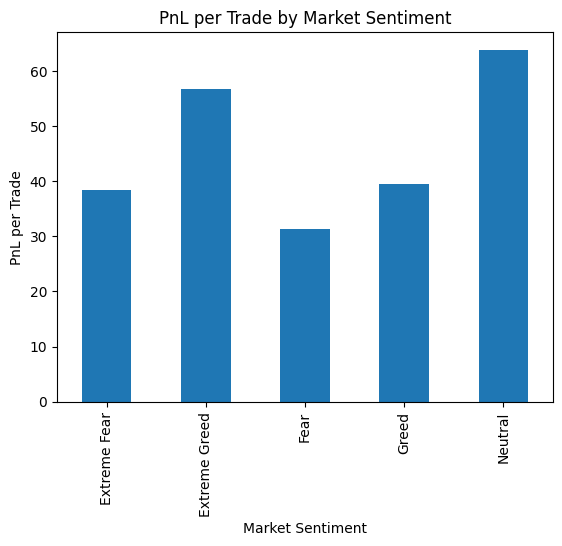

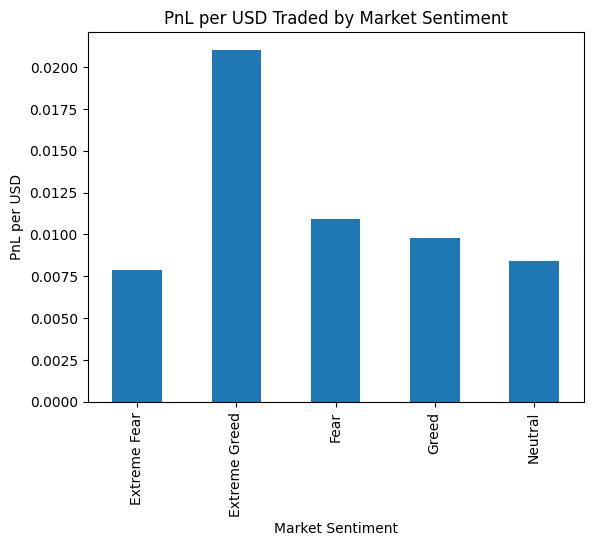

In [34]:
# =================================================
# STEP 5: HIDDEN PATTERNS & STRATEGY INSIGHTS
# =================================================

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ LOAD FINAL DATASET
# -------------------------------

df = pd.read_csv("csv_files/sentiment_trader_daily.csv")

# -------------------------------
# 2️⃣ CREATE ADVANCED METRICS
# -------------------------------

# PnL per trade (efficiency)
df['pnl_per_trade'] = df['total_pnl'] / df['trade_count']

# PnL per USD traded (capital efficiency)
df['pnl_per_volume'] = df['total_pnl'] / df['total_volume_usd']

# -------------------------------
# 3️⃣ SENTIMENT-WISE COMPARISON
# -------------------------------

pattern_summary = df.groupby('classification').agg(
    avg_total_pnl=('total_pnl', 'mean'),
    avg_pnl_per_trade=('pnl_per_trade', 'mean'),
    avg_pnl_per_volume=('pnl_per_volume', 'mean'),
    avg_trade_count=('trade_count', 'mean'),
    avg_win_rate=('win_rate', 'mean')
)

print("\nSentiment-wise Performance Summary:")
display(pattern_summary)

# -------------------------------
# 4️⃣ OVERTRADING DETECTION
# -------------------------------

plt.figure()
df.groupby('classification')['pnl_per_trade'].mean().plot(kind='bar')
plt.title("PnL per Trade by Market Sentiment")
plt.ylabel("PnL per Trade")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/pnl_per_trade_by_sentiment.png", bbox_inches='tight')
plt.show()

# -------------------------------
# 5️⃣ CAPITAL EFFICIENCY
# -------------------------------

plt.figure()
df.groupby('classification')['pnl_per_volume'].mean().plot(kind='bar')
plt.title("PnL per USD Traded by Market Sentiment")
plt.ylabel("PnL per USD")
plt.xlabel("Market Sentiment")
plt.savefig("outputs/pnl_per_volume_by_sentiment.png", bbox_inches='tight')
plt.show()

# -------------------------------
# 6️⃣ SAVE PATTERN SUMMARY
# -------------------------------

pattern_summary.to_csv(
    "csv_files/sentiment_pattern_summary.csv"
)
